# Descrição: algoritmo ML para detecção de câncer de mama

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset disponível em:\
(https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Descrição:
- "Breast Cancer Wisconsin (Diagnostic) Data Set"

## Breve análise dos dados

In [2]:
# carregando os dados
df = pd.read_csv('breast_cancer.csv')

In [3]:
# primeiras linhas do dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# lista de todas as colunas do dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# verificando o tipo das variáveis de cada coluna (se são strings, integers, floats, bool)
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

'diagnosis' tem formato 'object', o que provavelmente significa que os valores dessa coluna são strings (caracteres)

In [6]:
# formato do dataset (linhas; colunas)
df.shape

(569, 33)

In [7]:
# conferindo o número de valores em branco (NaN) do dataset
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df['diagnosis'].sample(10)

57     M
477    B
261    M
33     M
157    B
151    B
431    B
504    B
140    B
353    M
Name: diagnosis, dtype: object

**'diagnosis'** é a coluna que contém a classificação do câncer, se maligno (M) ou benigno (B)\
Esta coluna é o nosso **'target'**

In [9]:
# excluindo a coluna que contém apenas missing values (NaN)
df = df.drop('Unnamed: 32', axis=1)

In [10]:
# vendo a quantidade de 'benignos' e 'malignos' em nossos dados
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
# porcentagem de B e M
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

[Text(0.5, 1.0, 'Contagem de cada classificação'),
 Text(0.5, 0, 'Diagnóstico'),
 Text(0, 0.5, 'Número de ocorrências')]

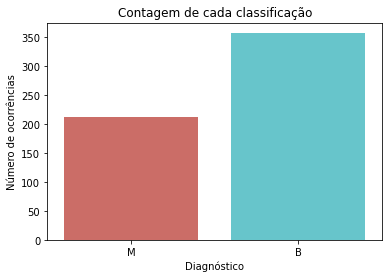

In [12]:
grafico = sns.countplot(df['diagnosis'], palette='hls')
grafico.set(title='Contagem de cada classificação', 
            xlabel='Diagnóstico', 
            ylabel='Número de ocorrências')

A quantidade das classificações é importante porque definirá a eficácia do modelo futuramente. Se treinarmos com a expressa maioria dos valores sendo de uma das categorias, nossa eficácia seria prejudicada quando fôssemos tentar prever com dados externos (out of sample data).

## Transformando os dados de diagnóstico
Scikit-learn, a biblioteca de onde importaremos os nossos modelos, apenas trabalha com números. Nossos dados de classificação (a coluna 'diagnosis') possui strings (caracteres). Precisamos transformar (**encoding**) esses caracteres em números (B e M para 0 e 1). Aí sim conseguiremos utilizar os modelos matemáticos para construirmos o algoritmo.

In [13]:
# importando o encoder
from sklearn.preprocessing import LabelEncoder

In [14]:
# instanciando o modelo
le_Y = LabelEncoder()

In [15]:
# passando os dados para o modelo e transformando(fitting the data)
le_Y.fit_transform(df['diagnosis'].values)
# substituindo a coluna 'diagnosis' com os novos dados
df['diagnosis'] = le_Y.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Em 'fit_transform' foram feitos dois passos ao mesmo tempo. Com fit, passamos os dados ao algoritmo. Com transform, esses dados são diretamente transformados pelo encoder assim que são passados.\
Essas etapas podem ser dividas, mas é mais ágil e eficaz fazê-los conjuntamente.

Note que foi atribuído "1" para "M", e "0" para "B". Normalmente, aquilo que nos importa mais deve ser representado como "1". Assim, LabelEncoder com parâmetros default já supriu nossa necessidade. Uma outra forma de fazer isso (importante para quando se trabalha com mais de um tipo de target, não binário), é a seguinte:\

 df['diagnosis_num'] = df['diagnosis'].map({'B': 0, 'M': 1})
 
Assim podemos passar os dados já convertidos para o modelo que iremos utilizar sem precisar transformar com LabelEncoder.

## Alternativa ao LabelEncoder (mapping)

In [13]:
df['diagnosis_num'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
df['diagnosis'] = df['diagnosis_num']

In [17]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## EDA
- EDA (Exploratory Data Analysis)
Precisamos analisar nossas colunas e seus relacionamentos para decidir que modelo escolher e como prosseguir; se, por exemplo, temos dados categóricos ou numéricos, ou se temos variáveis contínuas ou discretas.\
Uma boa forma de se fazer isso é utilizando os pairplots do Seaborn. Pairplots nos plotará gráficos de cada coluna x cada coluna. É uma ótima forma de visualizar como cada coisa se relaciona uma com a outra.\
Outra forma é utilizar a função .corr() do Pandas que nos diz uma % de correlação entre as colunas.

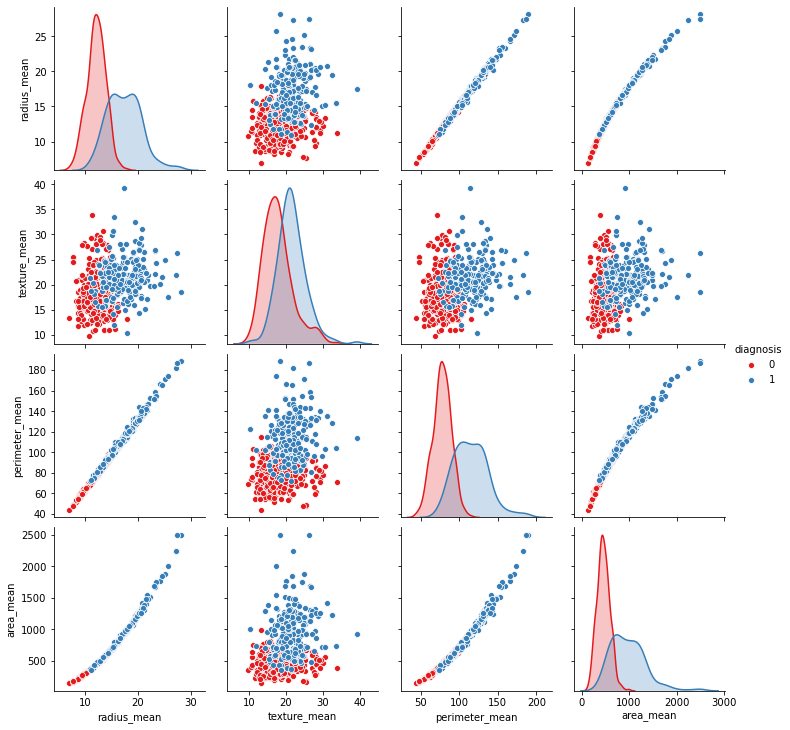

In [18]:
# plotando pairplots
sns.pairplot(df.iloc[:, 1:6], hue='diagnosis', palette='Set1')

In [19]:
# correlação de colunas
df.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


Note que 'radius_mean', 'perimeter_mean' e 'concave points_mean' são algumas colunas com alta correlação positiva com a coluna 'diagnosis'.

<AxesSubplot:>

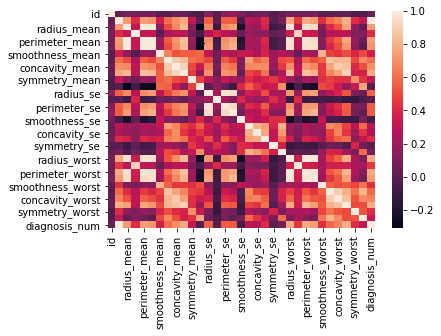

In [20]:
# visualizando essas correlações
sns.heatmap(df.iloc[:, :].corr())

<AxesSubplot:>

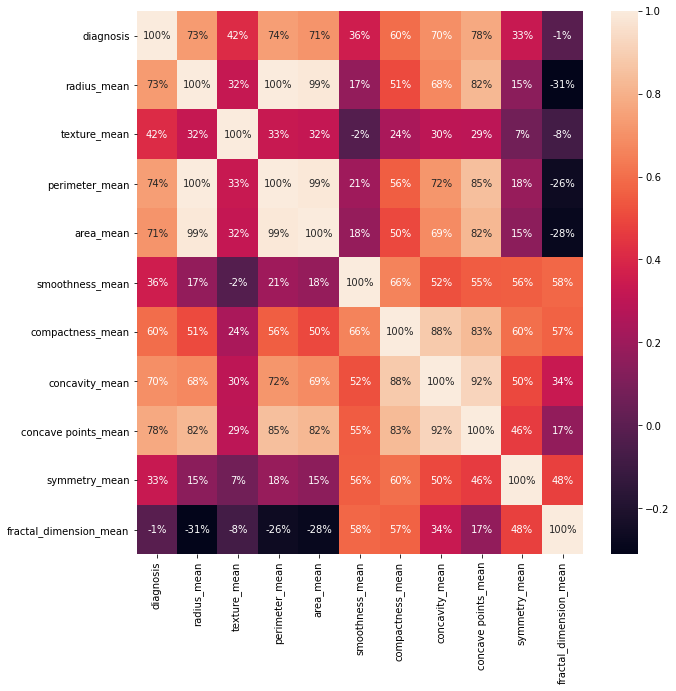

In [21]:
# visualizando essas correlações, coocando pocentagens nas células
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 1:12].corr(), annot=True, fmt='.0%')

## Escolhendo um modelo
Aqui precisamos ter em mente que estamos trabalhando com **classificação**, uma vez que nosso 'output' será o algoritmo nos dizendo se, para determinados dados, temos um câncer de um tipo ou de outro (B ou M).\
Além disso, nosso algoritmo é classificado como **supervisionado**, uma vez que sabemos os possíveis resultados da classificação e treinaremos o modelo dizendo quem é quem.

Na construção das variáveis, 'X' será formado de um ou mais **features**, que são as colunas com parâmetros que iremos analisar. 'y' será nosso **target**, que é a coluna que possui a classificação que estamos procurando.\

Scikit-learn trabalha com X bidimensional e y unidimensional. Ambos devem conter apenas números.

Neste exemplo usaremos inicialmente todas as colunas como features. Pode ser que essa não seja nossa melhor escolha, pois algumas dessas variáveis não influenciam em nada para dizer se a pessoa possui ou não câncer de mama. O ideal seria encontrar as variáveis que mais se adequam a isso e usar somente elas.

In [22]:
df.shape

(569, 33)

In [23]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_num
0,842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


Temos 33 colunas, sendo 'id' descartável, 'diagnosis' nosso target e 'diagnosis_num' uma coluna que já serviu seu propósito. Assim, selecionaremos as colunas 2 até 33 (lembre-se que essa contagem é exclusiva e começa do 0, portanto a coluna 33 não será incluída).

".values" nos permite transformar os dados para numpy array, que é o formato que scikite learn trabalha.

In [24]:
# construindo as variáveis
X = df.iloc[:, 2:32].values
y = df['diagnosis'].values

In [25]:
# conferindo que X e y são bidimensionais
X.shape

(569, 30)

In [26]:
y.shape

(569,)

In [27]:
# conferindo que X e y são np arrays
type(X)

numpy.ndarray

In [28]:
type(y)

numpy.ndarray

## Dividindo os dados em pedaços de treinamento e pedaços de testagem

Essa divisão é comum para que treinemos e testemos o modelo com dados do mesmo dataset, mas não com os mesmos dados. 

In [29]:
# importanto traintestsplit
from sklearn.model_selection import train_test_split

In [30]:
# por default traintestsplit divide os dados em 75/25 training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Feature Scaling

Como possuímos uma discrepância nos números de dados (muitos dados de câncer benigno e poucos de maligno), podemos padronizar a quantidade dos dados com FeatureScaling.\
Scaling é importante também quando se deseja utilizar modelos como k-nearest neighbors, Naive Bayes ou modelos baseado em estrutura de galhos (tree base models). O motivo disto está na forma como esses modelos fazem seus cálculos (distância euclidiana).

A lógica ao lidar com modelos do scikit learn é sempre a mesma:
- import > instantiate > fit ou fit_transform > predict.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Criando modelos
Utilizaremos alguns modelos diferentes para a detecção de cãncer e avaliaremos a performance de cada um deles.\
Assim, é útil criarmos uma função para não precisarmos repetir tudo todas as vezes que criarmos um novo modelo.

In [34]:
def modelos(X_train, y_train):
    
    # Logistic Regression (classificação, apesar do nome)
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(max_iter=1000, random_state=0)
    logreg.fit(X_train, y_train)
    
    # Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    # Testando a eficácia de cada modelo
    print('[0]LogisticRegression Training Accuracy:', logreg.score(X_train, y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return logreg, tree, forest

## Analisando a eficácia dos modelos com os dados usados no treinamento

In [35]:
modelo = modelos(X_train, y_train)

[0]LogisticRegression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9976525821596244


## Analisando a eficácia dos modelos com os dados de testagem 
### Usando a Matriz de Erro ou Matriz de Confusão

Padrão scikit-learn para a Matriz de Erro:\
 [ TN, FP ]\
 [ FN, TP ]
 
- TP = true positives
- FN = false negatives ou ERRO TIPO I
- FP = false positives ou ERRO TIPO II
- TN = true negatives

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
for i in range(len(modelo)):
    print('Modelo ', i+1)
    matriz = confusion_matrix(y_test, modelo[i].predict(X_test))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    
    print('Eficácia de testagem = ', (TP + TN) / float(TP + TN + FP + FN))
    print()

Modelo  1
Eficácia de testagem =  0.958041958041958

Modelo  2
Eficácia de testagem =  0.9440559440559441

Modelo  3
Eficácia de testagem =  0.9790209790209791



## Usando 'classification report'

In [38]:
from sklearn.metrics import classification_report

In [39]:
for i in range(len(modelo)):
    print('-' * 54)
    print('Modelo: ', i+1)
    print(classification_report(y_test, modelo[i].predict(X_test)))
    

------------------------------------------------------
Modelo:  1
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

------------------------------------------------------
Modelo:  2
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

------------------------------------------------------
Modelo:  3
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      

# Usando 'accuracy score'

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
for i in range(len(modelo)):
    print('-' * 8)
    print('Modelo', i+1)
    print(accuracy_score(y_test, modelo[i].predict(X_test)))

--------
Modelo 1
0.958041958041958
--------
Modelo 2
0.9440559440559441
--------
Modelo 3
0.9790209790209791


## Visualizando as predições com algum dos modelos

In [42]:
predição = modelo[2].predict(X_test)
print(predição)  # classificação calculada de cada paciente
print('-' * 70)
print(y_test)  #  a classificação real de cada paciente

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
----------------------------------------------------------------------
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
